In [1]:
!pip install pandas matplotlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("procedures.csv")
df.head()


,START,STOP,PATIENT,ENCOUNTER,SYSTEM,CODE,DESCRIPTION,BASE_COST,REASONCODE,REASONDESCRIPTION
0,2016-01-08T22:11:00Z,2016-01-08T22:26:08Z,fefe2107-b3ad-efef-20fc-6e023d49b6f6,a3c07d52-3f9c-16a2-07f8-30f48a0c5f44,http://snomed.info/sct,103697008,Patient referral for dental care (procedure),431.40,66383009.0,Gingivitis (disorder)
1,2015-07-16T07:02:40Z,2015-07-16T07:28:45Z,f4450fe1-83d7-0045-429b-3d5824a7321a,cf67c02b-0d05-c650-529f-bc5d5fe386cf,http://snomed.info/sct,301807007,Removal of subcutaneous contraceptive (procedure),15641.36,NaN,NaN
2,2015-07-16T07:28:45Z,2015-07-16T07:57:46Z,f4450fe1-83d7-0045-429b-3d5824a7321a,cf67c02b-0d05-c650-529f-bc5d5fe386cf,http://snomed.info/sct,169553002,Insertion of subcutaneous contraceptive (proce...,3910.33,NaN,NaN
3,2016-01-15T22:11:00Z,2016-01-15T22:36:07Z,fefe2107-b3ad-efef-20fc-6e023d49b6f6,43a9d9af-af9f-f48c-ce9d-fa3659d30c81,http://snomed.info/sct,34043003,Dental consultation and report (procedure),431.40,66383009.0,Gingivitis (disorder)
4,2016-01-15T22:36:07Z,2016-01-15T23:01:53Z,fefe2107-b3ad-efef-20fc-6e023d49b6f6,43a9d9af-af9f-f48c-ce9d-fa3659d30c81,http://snomed.info/sct,225362009,Dental care (regime/therapy),431.40,66383009.0,Gingivitis (disorder)


In [5]:
print(df.columns)



Index(['START', 'STOP', 'PATIENT', 'ENCOUNTER', 'SYSTEM', 'CODE',
       'DESCRIPTION', 'BASE_COST', 'REASONCODE', 'REASONDESCRIPTION'],
      dtype='object')


In [6]:
df.head()

,START,STOP,PATIENT,ENCOUNTER,SYSTEM,CODE,DESCRIPTION,BASE_COST,REASONCODE,REASONDESCRIPTION
0,2016-01-08T22:11:00Z,2016-01-08T22:26:08Z,fefe2107-b3ad-efef-20fc-6e023d49b6f6,a3c07d52-3f9c-16a2-07f8-30f48a0c5f44,http://snomed.info/sct,103697008,Patient referral for dental care (procedure),431.40,66383009.0,Gingivitis (disorder)
1,2015-07-16T07:02:40Z,2015-07-16T07:28:45Z,f4450fe1-83d7-0045-429b-3d5824a7321a,cf67c02b-0d05-c650-529f-bc5d5fe386cf,http://snomed.info/sct,301807007,Removal of subcutaneous contraceptive (procedure),15641.36,NaN,NaN
2,2015-07-16T07:28:45Z,2015-07-16T07:57:46Z,f4450fe1-83d7-0045-429b-3d5824a7321a,cf67c02b-0d05-c650-529f-bc5d5fe386cf,http://snomed.info/sct,169553002,Insertion of subcutaneous contraceptive (proce...,3910.33,NaN,NaN
3,2016-01-15T22:11:00Z,2016-01-15T22:36:07Z,fefe2107-b3ad-efef-20fc-6e023d49b6f6,43a9d9af-af9f-f48c-ce9d-fa3659d30c81,http://snomed.info/sct,34043003,Dental consultation and report (procedure),431.40,66383009.0,Gingivitis (disorder)
4,2016-01-15T22:36:07Z,2016-01-15T23:01:53Z,fefe2107-b3ad-efef-20fc-6e023d49b6f6,43a9d9af-af9f-f48c-ce9d-fa3659d30c81,http://snomed.info/sct,225362009,Dental care (regime/therapy),431.40,66383009.0,Gingivitis (disorder)


In [7]:
# Convert 'start' column to datetime
df['START'] = pd.to_datetime(df['START'])

# Extract the date only (no time)
df['DAY'] = df['START'].dt.date

print(df.columns)



Index(['START', 'STOP', 'PATIENT', 'ENCOUNTER', 'SYSTEM', 'CODE',
       'DESCRIPTION', 'BASE_COST', 'REASONCODE', 'REASONDESCRIPTION', 'DAY'],
      dtype='object')


In [8]:
# Filter rows where the description mentions surgery, anesthesia, or operation
surgery_df = df[df['DESCRIPTION'].str.contains("surgery|operation|anesthesia", case=False, na=False)]
surgery_df.head()


,START,STOP,PATIENT,ENCOUNTER,SYSTEM,CODE,DESCRIPTION,BASE_COST,REASONCODE,REASONDESCRIPTION,DAY
351,2022-06-13 02:50:27+00:00,2022-06-13T03:05:27Z,eda585dc-2b76-9523-0f7e-f63211ce1ddf,a28e887f-156f-421d-65d1-1cab00adfcc0,http://snomed.info/sct,18946005,Epidural anesthesia (procedure),1255.95,72892002.0,Normal pregnancy (finding),2022-06-13
977,2021-11-22 10:46:38+00:00,2021-11-22T11:01:38Z,79e3c870-22fa-9c9a-6663-5b868d751762,e60459a2-f97f-d234-5e74-b46743ad85f3,http://snomed.info/sct,18946005,Epidural anesthesia (procedure),3451.20,72892002.0,Normal pregnancy (finding),2021-11-22


In [9]:
# Count how many surgical procedures occurred each day
daily_counts = df['DAY'].value_counts().sort_index()
print(daily_counts.head())

DAY
2015-07-04    4
2015-07-06    2
2015-07-16    2
2015-07-18    6
2015-08-10    6
Name: count, dtype: int64


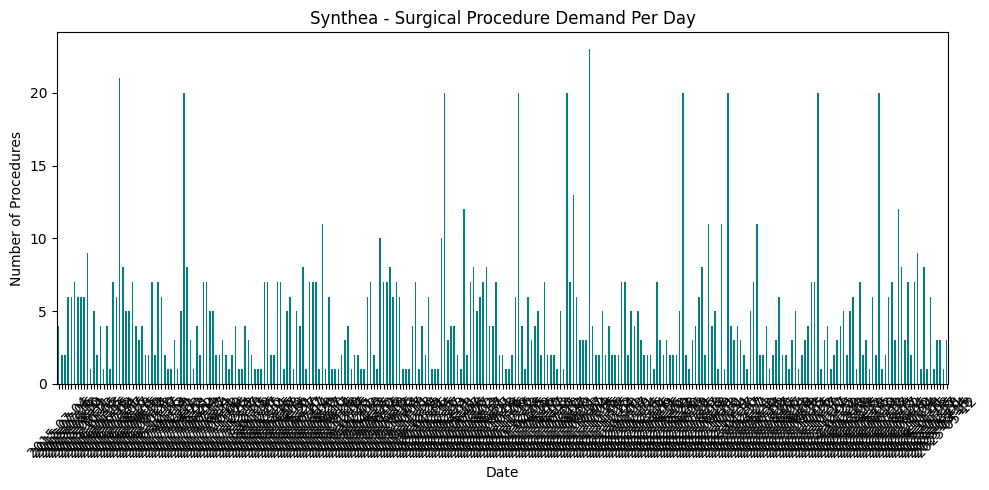

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the CSV file
df = pd.read_csv("procedures.csv")

# Step 2: Convert 'start' column to datetime and handle invalid dates
df['START'] = pd.to_datetime(df['START'], errors='coerce')

# Step 3: Create a new column 'day' by extracting date from 'start'
df['DAY'] = df['START'].dt.date

# Step 4: Drop rows where 'day' is missing (i.e., invalid dates)
df = df.dropna(subset=['DAY'])

# Step 5: Count number of procedures per day
daily_counts = df['DAY'].value_counts().sort_index()

# Step 6: Plot the daily procedure demand
plt.figure(figsize=(10, 5))
daily_counts.plot(kind='bar', color='teal')
plt.title("Synthea - Surgical Procedure Demand Per Day")
plt.xlabel("Date")
plt.ylabel("Number of Procedures")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [12]:
# Assumption: 1 anesthesiologist handles 3 procedures per day
procedures_per_anesth = 3

# Estimate required staff
staffing_needs = (daily_counts / procedures_per_anesth).apply(lambda x: int(x) + (x % 1 > 0))

# View estimated staffing
staffing_needs.head()


,count
DAY,
2015-07-04,2
2015-07-06,1
2015-07-16,1
2015-07-18,2
2015-08-10,2


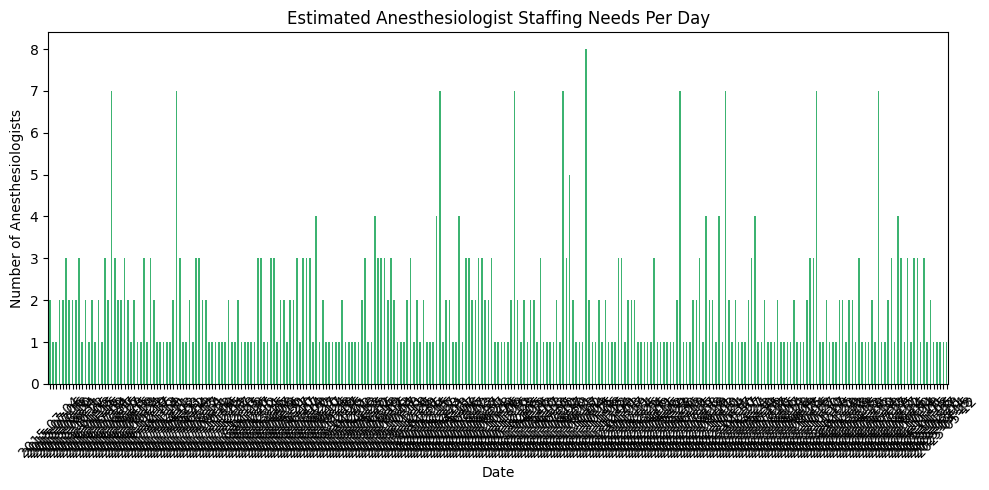

In [13]:
plt.figure(figsize=(10, 5))
staffing_needs.plot(kind='bar', color='mediumseagreen')
plt.title("Estimated Anesthesiologist Staffing Needs Per Day")
plt.xlabel("Date")
plt.ylabel("Number of Anesthesiologists")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [14]:
staffing_needs.to_csv("staffing_needs_per_day.csv", header=['required_anesthesiologists'])


In [15]:
import random

# Parameters
variation_pct = 0.2       # ±20%
procedures_per_anesth = 3
num_scenarios = 5         # You can increase this to 10, 50, etc.

# Store all scenarios in a dictionary
uncertain_scenarios = {}

for i in range(num_scenarios):
    scenario_name = f"Scenario_{i+1}"

    # Apply random ±20% variation to each day’s demand
    fluctuated_demand = daily_counts.apply(lambda x: int(x * (1 + random.uniform(-variation_pct, variation_pct))))

    # Compute staff needed (rounded up)
    staff_needed = fluctuated_demand.apply(lambda x: int(x / procedures_per_anesth) + (x % procedures_per_anesth > 0))

    uncertain_scenarios[scenario_name] = staff_needed

# Convert to DataFrame: rows = days, cols = scenarios
uncertainty_df = pd.DataFrame(uncertain_scenarios)
uncertainty_df.head()


,Scenario_1,Scenario_2,Scenario_3,Scenario_4,Scenario_5
DAY,,,,,
2015-07-04,2,2,1,2,2
2015-07-06,1,1,1,1,1
2015-07-16,1,1,1,1,1
2015-07-18,2,2,2,2,2
2015-08-10,2,2,2,2,2


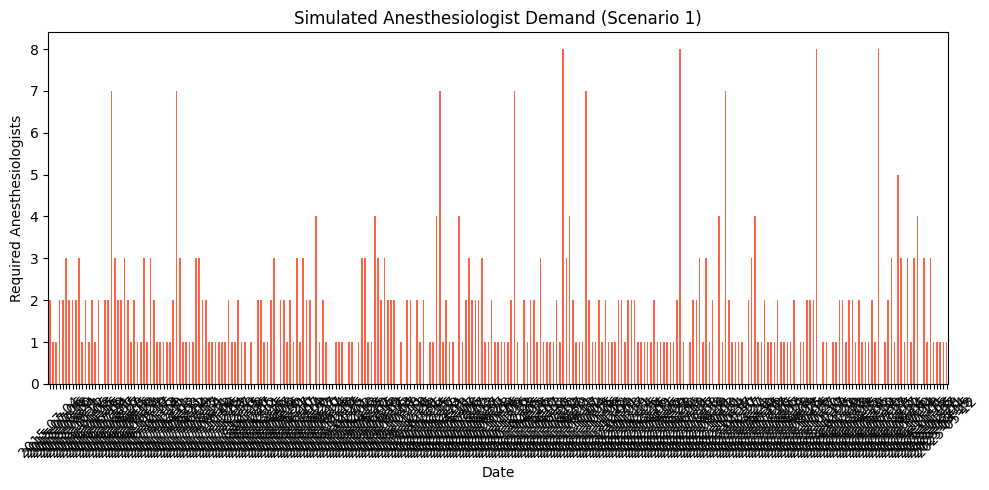

In [16]:
plt.figure(figsize=(10, 5))
uncertainty_df['Scenario_1'].plot(kind='bar', color='tomato')
plt.title("Simulated Anesthesiologist Demand (Scenario 1)")
plt.xlabel("Date")
plt.ylabel("Required Anesthesiologists")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [17]:
uncertainty_df.to_csv("simulated_demand_scenarios.csv")


In [18]:
# Choose CVaR confidence level (e.g., top 10% most demanding days)
alpha = 0.1

# Store CVaR values for each scenario
cvar_values = {}

for col in uncertainty_df.columns:
    sorted_needs = uncertainty_df[col].sort_values(ascending=False)
    cutoff = int(len(sorted_needs) * alpha)
    cvar = sorted_needs.iloc[:cutoff].mean()
    cvar_values[col] = round(cvar, 2)

# Show CVaR values
cvar_series = pd.Series(cvar_values)
print(" Estimated CVaR (avg staff needed in top 10% worst days):")
print(cvar_series.sort_values(ascending=False))


 Estimated CVaR (avg staff needed in top 10% worst days):
Scenario_1    5.00
Scenario_2    4.93
Scenario_3    4.74
Scenario_4    4.67
Scenario_5    4.63
dtype: float64


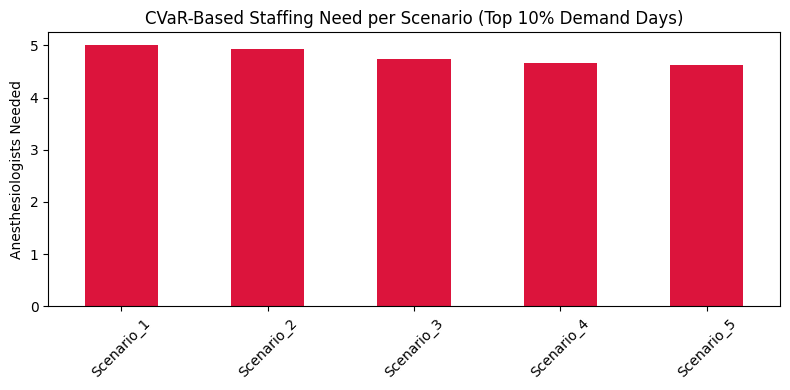

In [19]:
cvar_series.plot(kind='bar', color='crimson', figsize=(8, 4))
plt.title("CVaR-Based Staffing Need per Scenario (Top 10% Demand Days)")
plt.ylabel("Anesthesiologists Needed")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [20]:
# Pick 5 most variable days from one scenario
sample_demand = uncertainty_df['Scenario_1'].copy()
selected_days = sample_demand.sample(5, random_state=1)
print(selected_days)


DAY
2025-05-12    1
2019-01-25    1
2019-05-20    1
2024-08-17    2
2016-01-16    1
Name: Scenario_1, dtype: int64


In [21]:
# Initialize provider loads
providers = {'A1': 0, 'A2': 0, 'A3': 0}
schedule = {}

for day, demand in selected_days.items():
    day_assignments = {p: 0 for p in providers}

    for _ in range(demand):
        # Assign to provider with least total load
        selected = min(providers, key=providers.get)
        providers[selected] += 1
        day_assignments[selected] += 1

    schedule[day] = day_assignments

# Convert to DataFrame
import pandas as pd
schedule_df = pd.DataFrame(schedule).T.fillna(0).astype(int)
print("\nFairness-Aware Scheduling Plan (Provider Load per Day):")
print(schedule_df)

print("\nTotal Load per Provider:")
print(schedule_df.sum())



Fairness-Aware Scheduling Plan (Provider Load per Day):
            A1  A2  A3
2025-05-12   1   0   0
2019-01-25   0   1   0
2019-05-20   0   0   1
2024-08-17   1   1   0
2016-01-16   0   0   1

Total Load per Provider:
A1    2
A2    2
A3    2
dtype: int64


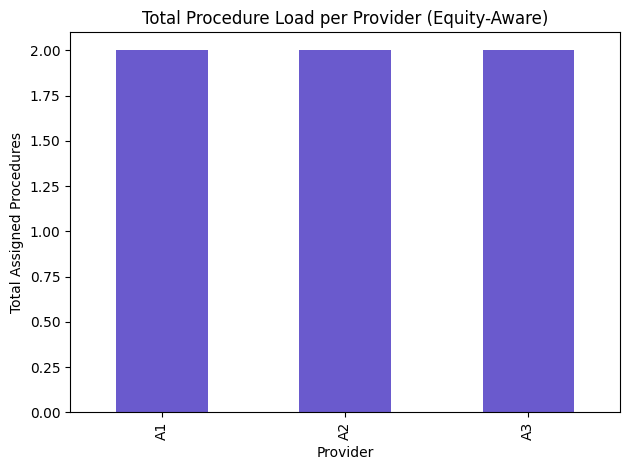

In [22]:
schedule_df.sum().plot(kind='bar', color='slateblue')
plt.title("Total Procedure Load per Provider (Equity-Aware)")
plt.ylabel("Total Assigned Procedures")
plt.xlabel("Provider")
plt.tight_layout()
plt.show()
